In [31]:
import os
import pandas as pd

                            # ~10 seconds to load all...
COAD_Normal = pd.read_excel('../../data/johnshopkins-data/COAD-PAIRED/COAD_NORMAL-TCGA-AA-3492.xlsx')
COAD_Tumor = pd.read_excel('../../data/johnshopkins-data/COAD-PAIRED/COAD_TUMOR-TCGA-AA-3492.xlsx')
LUSC_Normal = pd.read_excel('../../data/johnshopkins-data/LUSC-PAIRED/LUSC_NORMAL-TCGA-43-6771.xlsx')
LUSC_Tumor = pd.read_excel('../../data/johnshopkins-data/LUSC-PAIRED/LUSC_TUMOR-TCGA-43-6771.xlsx')
GBM_Normal = pd.read_excel('../../data/johnshopkins-data/GBM-PAIRED/GBM_NORMAL-TCGA-74-6573.xlsx')
GBM_Tumor = pd.read_excel('../../data/johnshopkins-data/GBM-PAIRED/GBM_TUMOR-TCGA-74-6573.xlsx')

In [32]:
COAD_Normal.head() # raw data contains NaN entries...

,Composite Element REF,Beta_value,Chromosome,Start,End,Gene_Symbol,Gene_Type,Transcript_ID,Position_to_TSS,CGI_Coordinate,Feature_Type
0,cg00000029,0.201456,chr16,53434200,53434201,RBL2;RBL2;RBL2,protein_coding;protein_coding;protein_coding,ENST00000262133.9;ENST00000544405.5;ENST000005...,-221;-1420;222,CGI:chr16:53434489-53435297,N_Shore
1,cg00000108,NaN,chr3,37417715,37417716,C3orf35;C3orf35;C3orf35;C3orf35;C3orf35;C3orf3...,lincRNA;lincRNA;lincRNA;lincRNA;lincRNA;lincRN...,ENST00000328376.8;ENST00000332506.6;ENST000004...,18552;18552;6505;31445;18143;447;18552;18552,CGI:chr3:37451927-37453047,.
2,cg00000109,NaN,chr3,172198247,172198248,FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B;FNDC3B,protein_coding;protein_coding;protein_coding;p...,ENST00000336824.7;ENST00000415807.5;ENST000004...,157692;158618;151333;71272;158587;71273,CGI:chr3:172039703-172040934,.
3,cg00000165,0.236720,chr1,90729117,90729118,.,.,.,.,CGI:chr1:90724932-90727247,S_Shore
4,cg00000236,0.877313,chr8,42405776,42405777,VDAC3,protein_coding,ENST00000022615.7,13872,CGI:chr8:42410918-42411241,.


In [33]:
# all lengths must be equal...
len(COAD_Normal), len(COAD_Tumor), len(LUSC_Normal), len(LUSC_Tumor), len(GBM_Normal), len(GBM_Tumor) 

(14999, 14999, 14999, 14999, 14999, 14999)

In [34]:
combined_methyl_df = pd.DataFrame(columns=['ID_REF', # creates dataframe
                                           'LUSC_tumor', 
                                           'LUSC_normal', 
                                           'COAD_tumor', 
                                           'COAD_normal', 
                                           'GBM_tumor', 
                                           'GBM_normal'])

ID_REF = COAD_Normal['Composite Element REF'] # same index for all datasets

COAD_N_BETA = COAD_Normal['Beta_value']
COAD_T_BETA = COAD_Tumor['Beta_value']
LUSC_N_BETA = LUSC_Normal['Beta_value']
LUSC_T_BETA = LUSC_Tumor['Beta_value']
GBM_N_BETA = GBM_Normal['Beta_value']
GBM_T_BETA = GBM_Tumor['Beta_value']


COAD_methyl_df = pd.DataFrame(columns=['ID_REF', # creates separate dataframe
                                           'COAD_tumor', 
                                           'COAD_normal'])

LUSC_methyl_df = pd.DataFrame(columns=['ID_REF',
                                           'LUSC_tumor', 
                                           'LUSC_normal'])

GBM_methyl_df = pd.DataFrame(columns=['ID_REF',
                                           'GBM_tumor', 
                                           'GBM_normal'])

In [35]:
combined_methyl_df['ID_REF'] = ID_REF               # populates combined dataframe 
combined_methyl_df['LUSC_tumor'] = LUSC_T_BETA
combined_methyl_df['LUSC_normal'] = LUSC_N_BETA
combined_methyl_df['COAD_tumor'] = COAD_T_BETA
combined_methyl_df['COAD_normal'] = COAD_N_BETA
combined_methyl_df['GBM_tumor'] = GBM_T_BETA
combined_methyl_df['GBM_normal'] = GBM_N_BETA

COAD_methyl_df['ID_REF'] = ID_REF                   # populates individual dataframe 
COAD_methyl_df['COAD_tumor'] = COAD_T_BETA
COAD_methyl_df['COAD_normal'] = COAD_N_BETA

LUSC_methyl_df['ID_REF'] = ID_REF
LUSC_methyl_df['LUSC_tumor'] = LUSC_T_BETA
LUSC_methyl_df['LUSC_normal'] = LUSC_N_BETA

GBM_methyl_df['ID_REF'] = ID_REF
GBM_methyl_df['GBM_tumor'] = GBM_T_BETA
GBM_methyl_df['GBM_normal'] = GBM_N_BETA

In [36]:
combined_methyl_df.head() # NaN's must be removed (but only after they've been combined.)


,ID_REF,LUSC_tumor,LUSC_normal,COAD_tumor,COAD_normal,GBM_tumor,GBM_normal
0,cg00000029,0.312090,0.277189,0.491594,0.201456,0.862540,0.625655
1,cg00000108,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00000109,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00000165,0.356855,0.152366,0.867351,0.236720,0.890708,0.223732
4,cg00000236,0.914564,0.874785,0.930446,0.877313,0.908234,0.924708


In [37]:
len(combined_methyl_df) # 14k out of 450k probes report a methyl value. :(

14999

In [38]:
combined_methyl_df = combined_methyl_df.dropna(how='any') 

COAD_methyl_df = COAD_methyl_df.dropna(how='any') 
LUSC_methyl_df = LUSC_methyl_df.dropna(how='any')
GBM_methyl_df = GBM_methyl_df.dropna(how='any')

In [39]:
len(COAD_methyl_df), len(LUSC_methyl_df), len(GBM_methyl_df), len(combined_methyl_df) # 12k out of possible 450k.

(12253, 12263, 12269, 12241)

In [40]:
small_combined_methyl_df = combined_methyl_df.head() # create a small df for testing...
small_combined_methyl_df

,ID_REF,LUSC_tumor,LUSC_normal,COAD_tumor,COAD_normal,GBM_tumor,GBM_normal
0,cg00000029,0.312090,0.277189,0.491594,0.201456,0.862540,0.625655
3,cg00000165,0.356855,0.152366,0.867351,0.236720,0.890708,0.223732
4,cg00000236,0.914564,0.874785,0.930446,0.877313,0.908234,0.924708
5,cg00000289,0.783759,0.788907,0.765557,0.765379,0.768677,0.716382
6,cg00000292,0.854914,0.754082,0.667273,0.599161,0.565240,0.567836


In [41]:
# %load '../methylator/annotation/annotate_450k.py'

import os

class Probe:
    """
    Holds Illumina 450k probe info for a single CpG site.
    """
    def __init__(self):
        self.id = None
        self. seq = None
        self.name = None
        self.chr = None
        self.cord = None
        self.strand = None
        self.gene = None
        self.refseq = None
        self.tour = None
        self.loc = None
        
class Interval:
    """
    Define a genomic interval by chromsome and strand orientation.
    """
    def __init__(self, chromosome, start, end, strand):
        self.chr = chromosome
        self.start = start
        self.end = end
        self.strand = strand

class Location:
    """
    Define a Probe location.
    """
    BODY = "Body"
    TSS200 = "TSS200"
    TSS1500 = "TSS1500"
    UTR5 = "5'UTR"
    UTR3 = "3'UTR"
    EXON = "Exon"

class CpG_location:
    """
    Defines a CpG location.
    """
    ISLAND = "Island"
    NSHORE = "N_Shore"
    SSHORE = "S_Shore"
    NSHELF = "N_Shelf"
    SSHELF = "S_Shelf"
    
class SNP:
    """
    Defines the SNPs in probes. Used to filter probes.
    """

    def __init__(self):
        self.probeid = None
        self.snpid = None
    
class Annotate_450k:
    """
    Parse and hold information about Illumina probes.
    """

    def __init__(self):        
        for i in open(anno_file, mode="r"):
            self.ann = os.path.join("../../data/", i.strip("\n").strip("\r"))

        self.probe = {}
        self.__run__()

    def __run__(self):
        """
        A static function to setup the Probe classes.
        """
        for i in open(self.ann, mode="r"):
            if i.startswith("cg"):
                data = i.split(",")
                # Assign probe information.
                new_probe = Probe()
                new_probe.id = data[0]
                new_probe.name = data[1]
                new_probe.seq = data[13]
                new_probe.chr = str(data[11])
                new_probe.cord = int(data[12])
                new_probe.strand = data[16]
                new_probe.gene = data[21].split(";")
                new_probe.refseq = data[22]
                locs = data[23].split(";")
                list_locs = []
                for i in locs:
                    if i not in list_locs:
                        list_locs.append(i)

                new_probe.loc = list_locs

                new_probe.tour = data[25]
                newcpg = {new_probe.id: new_probe}
                self.probe.update(newcpg)

    def get_probe(self, probe_id): #WORKS
        """
        Return probe info associated with an reference.
        """
        try:
            probe = self.probe[probe_id]
        except Exception as ex:
            probe = None
            print("WARNING: No probe with ref-id of %s found." % probe_id)
        return probe

    def get_all_probes(self):
        """
        Return list of all probes.
        """
        probe_list = []
        for probe in self.probe.keys():
            probe_list.append(self.get_probe(probe))
        return probe_list
    
    def get_probes_by_list(self, list_of_ids):
        """
        Return a list of probes from a list of references.
        """
        out_list = []
        for probe_id in list_of_ids:
            out_list.append(self.get_probe(probe_id))

        return out_list
    
    def get_probe_refs_by_gene(self, gene_name):
        """
        Get all probe references associated with a gene.
        """
        probes = {k: self.probe[k] for k in self.probe if gene_name in self.probe[k].gene}
        return self.get_keys(probes.keys())

    def get_probe_refs_by_location(self, probe_loc):
        """
        Get all probe references associated with a genomic location.
        """
        probes = {k: self.probe[k] for k in self.probe if probe_loc in self.probe[k].loc}
        return self.get_keys(probes.keys())

    def get_keys(self, dic_keys):
        """
        Get Probe reference from probe dictionaries.
        """
        l = []
        for i in dic_keys:
            l.append(i)
        return l

    def get_probes_by_gene(self, gene_name):
        """
        Return list of probes for an associated gene.
        """
        return self.get_probes_by_list(self.get_probe_refs_by_gene(gene_name))

    def get_probes_by_location(self, loc):
        """
        Return list of probes from genomic location.
        """
        return self.get_probes_by_list(self.get_probe_refs_by_location(loc))

    def get_probes_by_cpg(self, cpg_loc):
        """
        Get a list probes from cpg location.
        FIXME
        """
        return self.get_probes_by_list(self.get_probes_by_cpg(cpg_loc))

    def get_probes_by_chr(self, chr_loc):
        """
        Get a list of probes within a certain genomic region
        FIXME
        """
        print (chr_loc.chr)
        probes = {k: self.probe[k] for k in self.probe if
                  self.probe[k].chr == chr_loc.chr}

    def get_probes_by_chr_and_loc(self, chr_loc):
        """
        Get a list of probes within a certain genomic region
        FIXME
        """
        chrom = chr_loc.chr
        start = int(chr_loc.start)
        end = int(chr_loc.end)
        
        #print (chrom, start, stop)

        probes = {k: self.probe[k] for k in self.probe if
                  self.probe[k].chr == chrom and start < self.probe[k].cord < end}
        return probes

    def get_probe_keys_by_chr_and_loc(self, chr_loc):
        """
        Get a list of probe reference *keys* within a genomic region
        FIXME
        """
        probes = self.get_probes_by_chr_and_loc(chr_loc)
        return self.get_keys(probes)

    def get_number(self):
        """
        Return total number of probes.
        """
        number = 0
        for probe_id in self.probe.keys():
            number += 1

        return number

    def get_coord(self, probe):
        """
        Get genomic coordinate of a single probe.
        """
        return probe.cord
    
    def get_sorted_probes_by_id(self):
        """
        Sort probes according to probe id.
        """
        sorted_keys = sorted(list(self.probe.keys()))
        return sorted_keys
    
    def get_sorted_probes_by_chr(self):
        """
        Sort probes according to probe id.
        """
        return sorted(self.get_all_probes(), key=lambda x: x.chr)
    
    def remove_snp_probes(self):
        """
        Removes all SNPs associated with probes.
        """
        snp_list = []
        snp_file = open("../../data/humanmethylation450_dbsnp137.snpupdate.table.v2.sorted.txt", "r")
        for line in snp_file:
            if line.startswith("cg"):
                line = line.strip("\n").strip("\r").split("\t")
                new_snp = SNP()
                new_snp.probeid = line[0]
                new_snp.snpid = line[1]
                snp_list.append(new_snp)

        for snp in snp_list:
            self.probe.pop(snp.probeid)

anno_file = os.path.abspath("../../data/config.ini") # Illumina probe manifest. Note: This (large) file is not 
                                                     # in the repository.

# Functions to save/load dictionary objects. 

import _pickle as pickle

def save_obj(obj, name):
    with open('../../data/pickle/'+ name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f)
        
def load_obj(name):
    with open('../../data/pickle/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [42]:
annotate = Annotate_450k() # annotation object containing all probes 
annotate.get_number()

482421

In [43]:
small_combined_methyl_df

,ID_REF,LUSC_tumor,LUSC_normal,COAD_tumor,COAD_normal,GBM_tumor,GBM_normal
0,cg00000029,0.312090,0.277189,0.491594,0.201456,0.862540,0.625655
3,cg00000165,0.356855,0.152366,0.867351,0.236720,0.890708,0.223732
4,cg00000236,0.914564,0.874785,0.930446,0.877313,0.908234,0.924708
5,cg00000289,0.783759,0.788907,0.765557,0.765379,0.768677,0.716382
6,cg00000292,0.854914,0.754082,0.667273,0.599161,0.565240,0.567836


In [44]:
# add methylation data to annotation object.

methyl_probe_dict = {}

for index, row in combined_methyl_df.iterrows():
    methyl_probe_dict[row[0]] = annotate.probe.get(row[0]) # row[0] == 'cg00000029' i.e. key value
    setattr(methyl_probe_dict[row[0]], 'LUSC_tumor',  row[1]) # add spreadsheet attributes 
    setattr(methyl_probe_dict[row[0]], 'LUSC_normal', row[2])
    setattr(methyl_probe_dict[row[0]], 'COAD_tumor',  row[3])
    setattr(methyl_probe_dict[row[0]], 'COAD_normal', row[4])
    setattr(methyl_probe_dict[row[0]], 'GBM_tumor',   row[5])
    setattr(methyl_probe_dict[row[0]], 'GBM_normal',  row[6])

In [45]:
cg00000029 = methyl_probe_dict['cg00000029']
#[a for a in dir(cg00000029) if not a.startswith('__')] # list attributes of a single probe, including our data

In [47]:
meth_keys = methyl_probe_dict.keys()

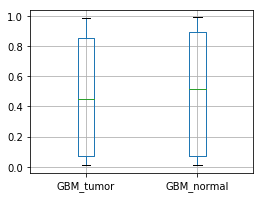

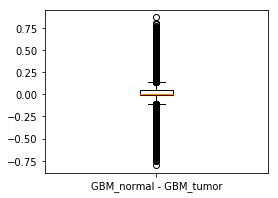

In [48]:
import matplotlib.pyplot as plt 
plt.close('all')

plt.figure(figsize=(4, 3))
combined_methyl_df.boxplot(column=['GBM_tumor', 'GBM_normal'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(combined_methyl_df['GBM_normal'] - combined_methyl_df['GBM_tumor'])
plt.xticks((1, ), ('GBM_normal - GBM_tumor', ))

plt.show() # showing all data from a single paired JHU dataset

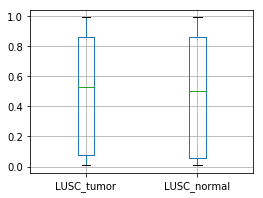

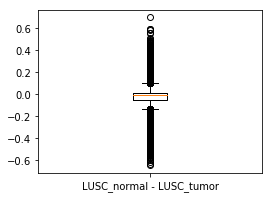

In [49]:
import matplotlib.pyplot as plt

# Box plot of LUSC_tumor and LUSC_normal
plt.figure(figsize=(4, 3))
combined_methyl_df.boxplot(column=['LUSC_tumor', 'LUSC_normal'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(combined_methyl_df['LUSC_normal'] - combined_methyl_df['LUSC_tumor'])
plt.xticks((1, ), ('LUSC_normal - LUSC_tumor', ))

plt.show() # showing all data from a single paired JHU dataset

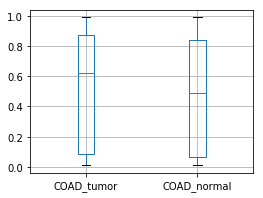

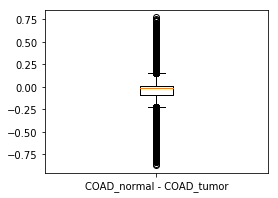

In [50]:
plt.close('all')

plt.figure(figsize=(4, 3))
combined_methyl_df.boxplot(column=['COAD_tumor', 'COAD_normal'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(combined_methyl_df['COAD_normal'] - combined_methyl_df['COAD_tumor'])
plt.xticks((1, ), ('COAD_normal - COAD_tumor', ))

plt.show() # showing all data from a single paired JHU dataset